Com problemas quando tem ruído, usar stream mux??

In [1]:
from scipy.io import wavfile
fs, data = wavfile.read("song.wav")

In [2]:
fs

44100

In [3]:
with open("song.wav", "rb")as f:
    _ = f.read()

In [4]:
data.shape

(4454100, 2)

In [5]:
data.dtype

dtype('int16')

In [6]:
#data2 = data[:4454100//8].ravel()

In [7]:
eightBit = np.array(((data[:len(data)//8] + 32768)) >> 8, dtype = np.uint8)

In [8]:
wavfile.write("reduced.wav", fs , eightBit)

In [9]:
prefix = np.random.randint(0, 256, 100, dtype = np.uint8)
prefix

array([104,  26, 231, 173,  71, 247,  51,  77, 204,  10,  86, 187,  69,
       204,  57,   5,  43,  89, 238, 208, 172,  44, 217, 185, 221, 190,
       189,  55,  57, 149, 161, 215, 111,  48,  51, 144,  26, 106, 221,
       164,  60, 254, 160, 201,  15, 161, 219, 109, 229, 123, 109, 233,
        13, 251,  89, 144, 151,  84, 109, 226, 232, 225, 143,  49, 204,
       124,  56, 108, 221, 167,  48,  42, 205, 230,  75,  61, 146, 211,
       255,   7, 105, 101, 200,  44, 162, 172,  93, 149, 186,  21,  52,
        95, 201,  73,  30,  74, 176,  85,  27, 196], dtype=uint8)

In [10]:
with open("prefixData.data", "wb") as f:
    f.write(prefix)
    f.write(eightBit)

In [11]:
eightBit.shape

(556762, 2)

In [12]:
bits = np.unpackbits(eightBit.ravel())

In [13]:
bits[:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [14]:
bits ^= np.random.random(bits.shape) < 0.001

In [15]:
bits[:100]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [16]:
np.mean(np.equal(bits, np.unpackbits(eightBit.ravel())))

0.9990017053965609

In [17]:
final = np.packbits(bits).reshape(eightBit.shape)

In [18]:
wavfile.write("BSC.wav", fs , final)

In [19]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read('reduced.wav') # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)

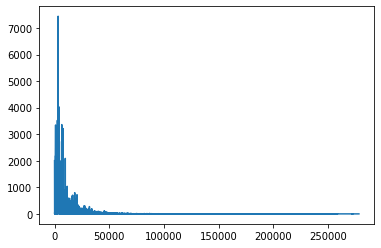

In [20]:
plt.plot(np.abs(c[:(int(d)-1)])) 
plt.show()

In [21]:
fs, data = wavfile.read('BSC.wav') # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)

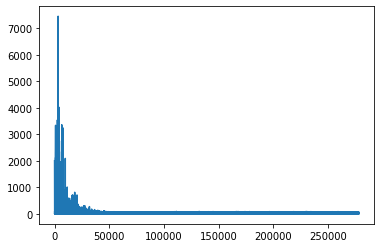

In [22]:
plt.plot(np.abs(c[:(int(d)-1)])) 
plt.show()

In [23]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [38]:
order = 6
fs = 44100      # sample rate, Hz
cutoff = 1000  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

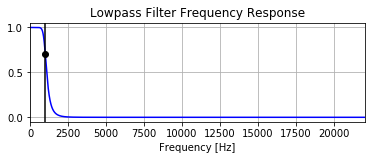

In [39]:
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

In [40]:
y = butter_lowpass_filter(final.ravel(), cutoff, fs, order)

In [41]:
y = y.reshape(eightBit.shape).astype(np.uint8)

In [42]:
a = y.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)

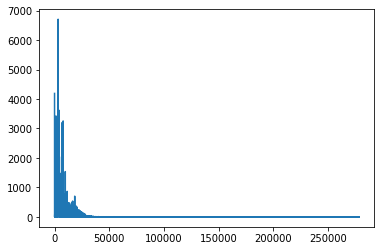

In [43]:
plt.plot(np.abs(c[:(int(d)-1)])) 
plt.show()

In [37]:
wavfile.write("y.wav", fs , y)